In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

/Users/albarron/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
url = "../HW assignments/HW2/admissions.csv"
AdmissionData = pd.read_csv(url)
print(AdmissionData.head(5))
print(AdmissionData.describe())

   admit  gre   gpa  prestige
0      0  380  3.61         3
1      1  660  3.67         3
2      1  800  4.00         1
3      1  640  3.19         4
4      0  520  2.93         4
            admit         gre        gpa    prestige
count  400.000000  398.000000  398.00000  399.000000
mean     0.317500  588.040201    3.39093    2.486216
std      0.466087  115.628513    0.38063    0.945333
min      0.000000  220.000000    2.26000    1.000000
25%      0.000000  520.000000    3.13000    2.000000
50%      0.000000  580.000000    3.39500    2.000000
75%      1.000000  660.000000    3.67000    3.000000
max      1.000000  800.000000    4.00000    4.000000


In [3]:
# Let's get rid of Missing values - there are only a few missing values so, let's drop them all
AdmissionData.dropna(inplace = True)
AdmissionData.describe() # Only 3 rows are dropped

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


#### Our goal is to predict Admission based on 3 variables (gre, gpa, prestige). We do need to standardize our data first, otherwise, GRE would have more weight than GPA and prestige. This is one of the most important steps!

In [4]:
# Let's write our own Standardizing function
def Standardize(X):
    X_Max = X.max()
    X_Min = X.min()
    X_Standardized = (X-X_Min)/(X_Max - X_Min)
    return X_Standardized

AdmissionData['gre']= Standardize(AdmissionData['gre'])
AdmissionData['gpa'] = Standardize(AdmissionData['gpa'])
AdmissionData['prestige'] = Standardize(AdmissionData['prestige'])

#Alternatively we could do it this way
"""
NameOfVariables = ['gre','gpa','prestige']
for i in NameOfVariables:
    AdmissionData[i] = Standardize(AdmissionData[i])
"""
AdmissionData.head(5)

,admit,gre,gpa,prestige
0,0,0.275862,0.775862,0.666667
1,1,0.758621,0.810345,0.666667
2,1,1.000000,1.000000,0.000000
3,1,0.724138,0.534483,1.000000
4,0,0.517241,0.385057,1.000000


/Users/albarron/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(....) is deprecated, use sort_index(.....)
  if __name__ == '__main__':


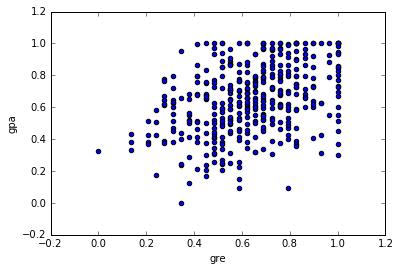

In [5]:
AdmissionData.sort().plot(x='gre',y='gpa',kind='scatter');

In [6]:
from sklearn import neighbors, metrics

In [7]:
X = AdmissionData[['gre','gpa','prestige']]
y = AdmissionData['admit']

knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform')
#n_neighbors is number of neighbors you would like to search 
#weights can be set to 'uniform' or 'distance'
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform')

#### You can measure precision of your prediction either by manually computing it or using knn.score

In [8]:
y_hat = knn.predict(X)
Score1 = knn.score(X,y)
Score2 = float(sum(y_hat == y))/len(AdmissionData) # Validating precision
print(Score1)
print(Score2)

0.76322418136
0.76322418136


#### What is the optimal number of neighbors?

To answer this question we do need to rely on validation or corss-validation error. 

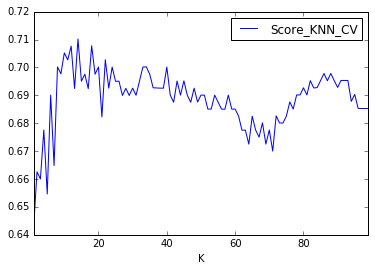

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import cross_validation

kf = cross_validation.KFold(len(AdmissionData), n_folds = 10, shuffle = True) #10 fold CV
Score_KNN_CV = []
RangeOfK = range(1,100)
scores = []
for k in RangeOfK:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k, weights='uniform')
    scores = []
    for train_index, test_index in kf:        
        knn.fit(X.iloc[train_index], y.iloc[train_index])
        scores.append(knn.score(X.iloc[test_index],y.iloc[test_index]))
    Score_KNN_CV.append(np.mean(scores))

Score_KNN_CV_df = pd.DataFrame({'Score_KNN_CV': Score_KNN_CV ,'K': RangeOfK })
Score_KNN_CV_df.plot(x = 'K',y = 'Score_KNN_CV')


#### How was the fit? What is the best we can do?

The best accuracy we can get is around 71 to 72 percent. It may be tempting to conclude this is a good result. But let's compare this algorithm with an easier one! Let's use a prediction model always predicts people will not get admitted and let's compare our results with that terrible predictor!

In [10]:
sum(AdmissionData['admit'])
float(len(AdmissionData)-sum(AdmissionData['admit']))/len(AdmissionData)

0.6826196473551638

That algorithm has accuracy of 68 percent!

#### Now let's see how changing 'unifrom' to 'distance' would affect our results

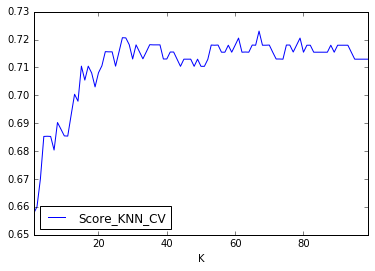

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import cross_validation

kf = cross_validation.KFold(len(AdmissionData), n_folds = 10, shuffle = True) #10 fold CV
Score_KNN_CV = []
RangeOfK = range(1,100)
scores = []
for k in RangeOfK:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance')
    scores = []
    for train_index, test_index in kf:        
        knn.fit(X.iloc[train_index], y.iloc[train_index])
        scores.append(knn.score(X.iloc[test_index],y.iloc[test_index]))
    Score_KNN_CV.append(np.mean(scores))

Score_KNN_CV_df = pd.DataFrame({'Score_KNN_CV': Score_KNN_CV ,'K': RangeOfK })
Score_KNN_CV_df.plot(x = 'K',y = 'Score_KNN_CV')

It doesn't show a brighter picture!

#### What would be the result before standardizing your data?

In [12]:
url = "https://raw.githubusercontent.com/ga-students/SF-DAT-20/master/HW%20assignments/HW2/admissions.csv"
AdmissionData = pd.read_csv(url)
AdmissionData.dropna(inplace = True)
X = AdmissionData[['gre','gpa','prestige']]
y = AdmissionData['admit']

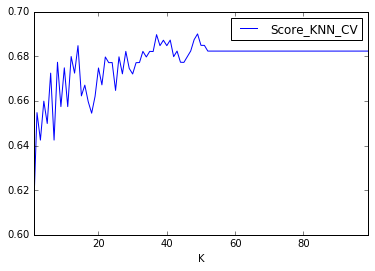

In [13]:

kf = cross_validation.KFold(len(AdmissionData), n_folds = 10, shuffle = True) #10 fold CV
Score_KNN_CV = []
RangeOfK = range(1,100)

for k in RangeOfK:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k, weights='uniform')
    scores = []
    for train_index, test_index in kf:        
        knn.fit(X.iloc[train_index], y.iloc[train_index])
        scores.append(knn.score(X.iloc[test_index],y.iloc[test_index]))
    Score_KNN_CV.append(np.mean(scores))

Score_KNN_CV_df = pd.DataFrame({'Score_KNN_CV': Score_KNN_CV ,'K': RangeOfK })
Score_KNN_CV_df.plot(x = 'K',y = 'Score_KNN_CV')


It actually, gives you a worse result!

## KNN and Regression Models

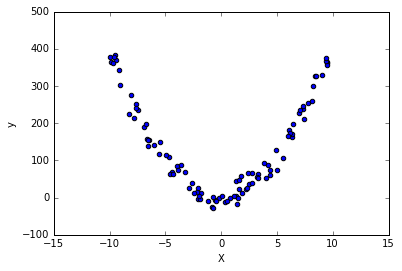

In [14]:
import random
# let's use the simulated model we used in Lecture 6
#Let's generate 100 random numbers between -10 and 10
x = np.zeros(100)
for i in range(100):
   x[i] = random.uniform(-10, 10)

#Let's generate some error term with mean 0 and s.d. = 20
error = np.random.normal(0,20,100)
#Now let's generate y with a polynomial degree 2 relationship with x

y = 3 + 1.5 * x + 4 * (x ** 2) + error
df = pd.DataFrame({'X': x, 'y': y})

df.plot(kind = 'scatter', x = 'X', y = 'y')




In [15]:
# No need to standardize if only one input
knn = neighbors.KNeighborsRegressor(n_neighbors = 20, weights='uniform') # Use Regressor instead of classifier
X = df[['X']]
y = df['y']
knn.fit(X,y) # Use x AND y
y_hat = knn.predict(X)

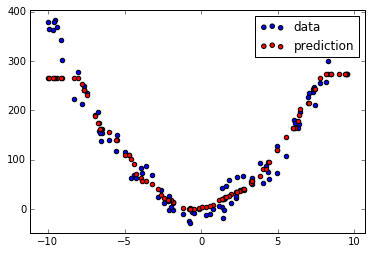

In [16]:
plt.scatter(X, y, label='data')
plt.scatter(X, y_hat, c = 'r',label='prediction')
plt.axis('tight')
plt.legend()
plt.show()
# Not very good at mapping the tail

In [17]:
knn.score(X,y) # in regression returns R^2
MSE = float(sum((y-y_hat)**2))/len(y)# if you are interested to get MSE

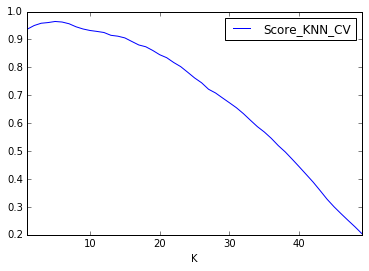

In [22]:

kf = cross_validation.KFold(len(df), n_folds = 10, shuffle = True) #10 fold CV
Score_KNN_CV = []
RangeOfK = range(1,50) # k is half of sample size
scores = []
for k in RangeOfK:
    knn = neighbors.KNeighborsRegressor(n_neighbors=k, weights='uniform')
    scores = []
    for train_index, test_index in kf:        
        knn.fit(X.iloc[train_index], y.iloc[train_index])
        scores.append(knn.score(X.iloc[test_index],y.iloc[test_index]))
    Score_KNN_CV.append(np.mean(scores))

Score_KNN_CV_df = pd.DataFrame({'Score_KNN_CV': Score_KNN_CV ,'K': RangeOfK })
Score_KNN_CV_df.plot(x = 'K',y = 'Score_KNN_CV')

It seems like k between 3 to 8 gives you the best result. let's look at the graph after setting k = 5

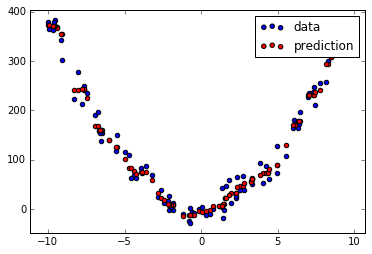

In [19]:
knn = neighbors.KNeighborsRegressor(n_neighbors = 5, weights='uniform')
X = df[['X']]
y = df['y']
knn.fit(X,y)
y_hat = knn.predict(X)
plt.scatter(X, y, label='data')
plt.scatter(X, y_hat, c = 'r',label='prediction')
plt.axis('tight')
plt.legend()
plt.show()